In [36]:
import pandas as pd
df3=pd.read_csv("raw_data/Crop_recommendation.csv")
df=df3.copy()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [39]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [40]:
X=df.drop(["label"],axis=1)
Y=df["label"]

In [41]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [42]:
Y.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: xlabel='label'>

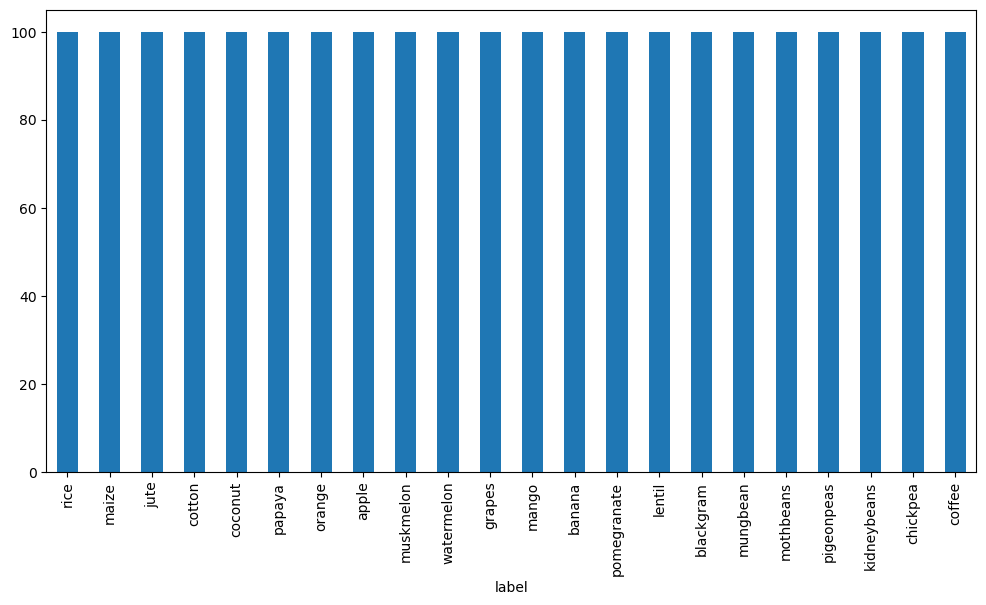

In [44]:
import matplotlib.pyplot as plt
Y.value_counts().plot(kind="bar",figsize=(12,6))

<Axes: >

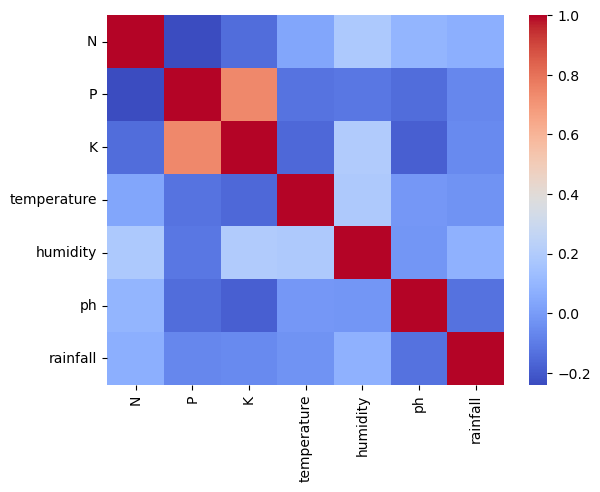

In [45]:
import seaborn as sns
sns.heatmap(x_train.corr(),cmap="coolwarm")

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model=RandomForestClassifier(n_estimators=300, max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=42,n_jobs=-1)
model.fit(x_train,y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
y_pred=model.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      pa

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, Y, cv=5, scoring="accuracy")

print("Cross Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross Validation Scores: [0.99772727 0.99090909 0.99545455 0.99545455 0.99090909]
Mean Accuracy: 0.9940909090909091


In [50]:
import pandas as pd

importance = pd.Series(model.feature_importances_, index=X.columns)
print(importance.sort_values(ascending=False))


rainfall       0.228162
humidity       0.212135
K              0.179667
P              0.143884
N              0.106928
temperature    0.074933
ph             0.054290
dtype: float64
